In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Algerian_forst_fire_cleaned.csv',index_col=0)

In [3]:
df.drop(columns=['month','day','year'],inplace=True)

In [4]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [132]:
X , y = df.drop(columns='FWI') , df['FWI']

In [6]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [7]:
X_train.shape , X_test.shape

((183, 11), (61, 11))

## Feature Selection

In [9]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.558393,0.518119,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.569997,-0.435023,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.028799,-0.066529,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.322682,-0.379449,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.686033,0.770114,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.874778,0.584188,0.191094
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.740189,0.507122,-0.081489
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.907461,0.735511,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941904,0.635891,1.000000,0.857771,0.583882,0.087370
FWI,0.558393,-0.569997,0.028799,-0.322682,0.686033,0.874778,0.740189,0.907461,0.857771,1.000000,0.713357,0.192451


## Check for multicollinearity.

<Axes: >

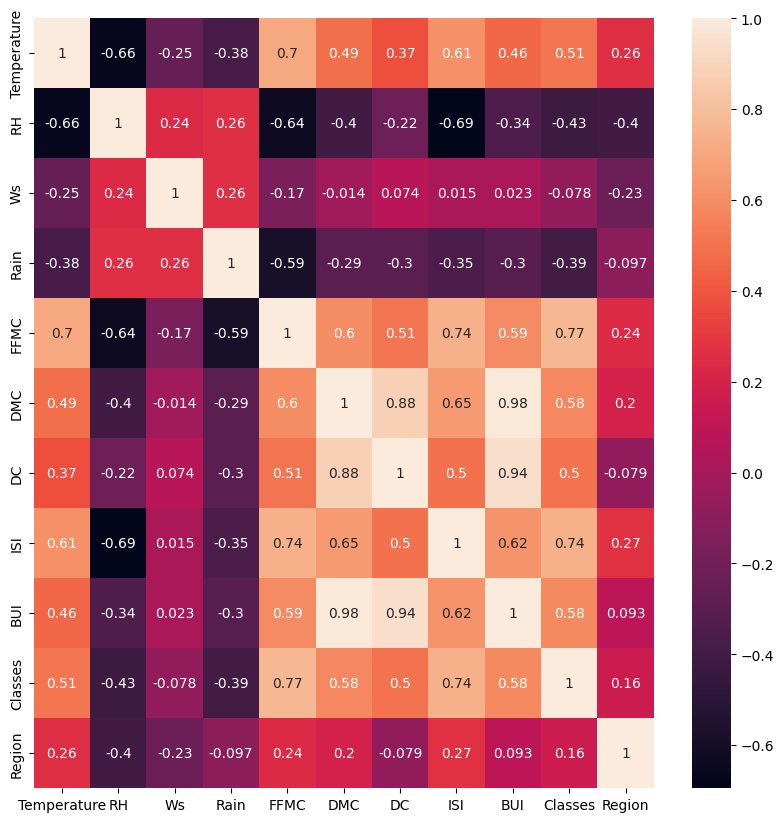

In [11]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True)

In [12]:
def correlation(dataset , threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [13]:
correlation(X_train,0.85)

{'BUI', 'DC'}

## Drop the features with high correlation

In [15]:
X_train.drop(columns=['BUI','DC'],inplace=True)
X_test.drop(columns=['BUI','DC'],inplace=True)

## Feature scaling Or Standardization.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Boxplots to understand the Effect of Standard Scaler

Text(0.5, 1.0, 'X_train after scaling.')

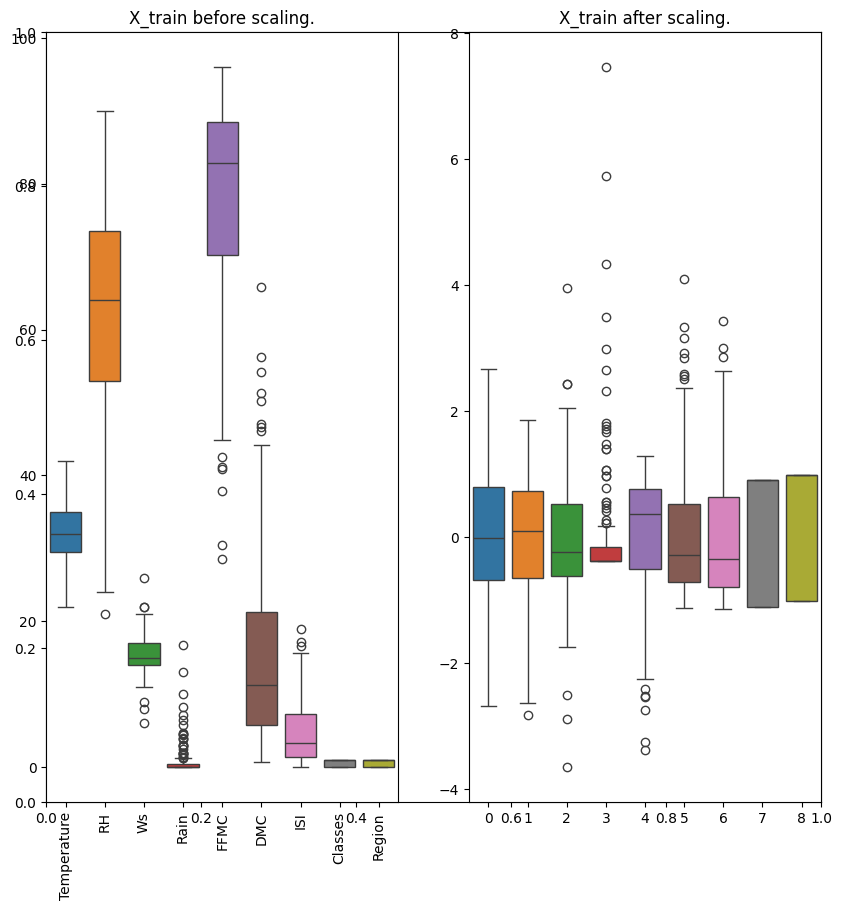

In [25]:
plt.subplots(figsize=(10,10))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.xticks(rotation=90)
plt.title('X_train before scaling.')
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title('X_train after scaling.')

## build Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [59]:
from sklearn.metrics import mean_absolute_error
print('Training acc :',regressor.score(X_train_scaled,y_train) ,
      '\nTesting acc :',regressor.score(X_test_scaled,y_test),
     '\nMean Absolute Error :',mean_absolute_error(y_test,regressor.predict(X_test_scaled)))

Training acc : 0.9458123088396755 
Testing acc : 0.9869140740800543 
Mean Absolute Error : 0.6664617032747241


## build Lasso model

In [63]:
from sklearn.linear_model import Lasso
regressor_lasso = Lasso()
regressor_lasso.fit(X_train_scaled,y_train)

Lasso()

In [65]:
print('Training acc :',regressor_lasso.score(X_train_scaled,y_train) ,
      '\nTesting acc :',regressor_lasso.score(X_test_scaled,y_test),
     '\nMean Absolute Error :',mean_absolute_error(y_test,regressor_lasso.predict(X_test_scaled)))

Training acc : 0.9162714358686825 
Testing acc : 0.9467766860821712 
Mean Absolute Error : 1.2605401955498963


## build Ridge model

In [77]:
from sklearn.linear_model import Ridge
regressor_ridge = Ridge()
regressor_ridge.fit(X_train_scaled,y_train)

Ridge()

In [79]:
print('Training acc :',regressor_ridge.score(X_train_scaled,y_train) ,
      '\nTesting acc :',regressor_ridge.score(X_test_scaled,y_test),
     '\nMean Absolute Error :',mean_absolute_error(y_test,regressor_ridge.predict(X_test_scaled)))

Training acc : 0.9457671212752173 
Testing acc : 0.9862237842436801 
Mean Absolute Error : 0.6883193873126454


## build Elastic net model

In [81]:
from sklearn.linear_model import ElasticNet
regressor_elastic = ElasticNet()
regressor_elastic.fit(X_train_scaled,y_train)

ElasticNet()

In [83]:
print('Training acc :',regressor_elastic.score(X_train_scaled,y_train) ,
      '\nTesting acc :',regressor_elastic.score(X_test_scaled,y_test),
     '\nMean Absolute Error :',mean_absolute_error(y_test,regressor_elastic.predict(X_test_scaled)))

Training acc : 0.8630372858552755 
Testing acc : 0.8723294894980855 
Mean Absolute Error : 1.9220121398572443


In [85]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV()
lassocv.fit(X_train_scaled,y_train)

LassoCV()

In [87]:
print('Training acc :',lassocv.score(X_train_scaled,y_train) ,
      '\nTesting acc :',lassocv.score(X_test_scaled,y_test),
     '\nMean Absolute Error :',mean_absolute_error(y_test,lassocv.predict(X_test_scaled)))

Training acc : 0.9455125291135189 
Testing acc : 0.9858370744565005 
Mean Absolute Error : 0.7023895886240232


## We can see that LassoCV is our best model with most accuracy and least MAE.
- Now It's time for pickling our Machine learning and preprocessing models for deployment.

In [138]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(lassocv,open('lassocv.pkl','wb'))